In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

from helper import *
import numpy as np
import scipy.sparse as sparse
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve,auc
from tqdm import tqdm

In [ ]:
# 1.1) Read the edgelist of the NetScience network
train_df=pd.read_table('train.txt',header=None,delimiter=' ',names=['source', 'target', 'label'])
print(train_df.head())

x_train=train_df[['source','target']]
print(x_train.head())

y_train=train_df[['label']]
print(y_train.head())

   source  target  label
0     939    3809      1
1    2442    5784      1
2     179    3809      1
3     857    2280      1
4    1358    5722      1
   source  target
0     939    3809
1    2442    5784
2     179    3809
3     857    2280
4    1358    5722
   label
0      1
1      1
2      1
3      1
4      1


In [ ]:
print(x_train.shape)

(10496, 2)


In [ ]:
node_df = pd.read_csv('node_information.csv', header=None)
node_df.head()

,0,1,2,3,4,5,6,7,8,9,...,923,924,925,926,927,928,929,930,931,932
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
node_features = node_df.iloc[:, 1:].values.astype(float)
df_features = pd.DataFrame(node_features)
df_features.index=node_df.iloc[:,0]

In [ ]:
df_features.head()

,0,1,2,3,4,5,6,7,8,9,...,922,923,924,925,926,927,928,929,930,931
0,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
G = nx.Graph()

# add nodes to the graph with their features
for row in node_df.itertuples():
    node_id = row[1]
    features = row[2:]
    G.add_node(node_id, features=features)

# add edges to the graph
for row in train_df.itertuples():
    source = row[1]
    target = row[2]
    label = row[3]
    if label == 1:
        G.add_edge(source, target)

# print information about the graph
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())

Number of nodes: 3597
Number of edges: 5248


In [ ]:
# 1.2) Compute various characteristics of the network
def compute_network_characteristics(graph):
    prop = {}
    prop['N'] = graph.number_of_nodes() # number of nodes
    prop['M'] = graph.number_of_edges() # number of edges
    # degrees = list(dict(G.degree()).values())
    degrees = [degree for node, degree in graph.degree()] # degree list
    prop['min_degree'] = np.min(degrees) # minimum degree
    prop['max_degree'] = np.max(degrees) # maximum degree
    prop['mean_degree'] = np.mean(degrees) # mean of node degrees
    prop['median_degree'] = np.median(degrees) # median of node degrees
    prop['density'] = nx.density(graph) # density of the graph
    return prop

###################################################################
prop = compute_network_characteristics(graph=G)
print("Number of nodes: {}".format(prop['N']))
print("Number of edges: {}".format(prop['M']))
print("Min. degree: {}".format(prop['min_degree']))
print("Max. degree: {}".format(prop['max_degree']))
print("Mean degree: {}".format(prop['mean_degree']))
print("Median degree: {}".format(prop['median_degree']))
print("Density: {}".format(prop['density']))

Number of nodes: 3597
Number of edges: 5248
Min. degree: 1
Max. degree: 361
Mean degree: 2.917987211565193
Median degree: 2.0
Density: 0.000811453618344047


In [ ]:
def get_gcc(graph):
    # Is the given graph connected?
    connected = nx.is_connected(graph) # check if the graph is connected or not
    if connected:
        print("The graph is connected")
        return graph
    
    print("The graph is not connected")
    
    # Find the number of connected components
    num_of_cc = nx.number_connected_components(graph)
    print("Number of connected components: {}".format(num_of_cc))
    
    # Get the greatest connected component subgraph
    gcc_nodes = max(nx.connected_components(graph), key=len)
    gcc = graph.subgraph(gcc_nodes)
    node_fraction = gcc.number_of_nodes() / float(graph.number_of_nodes())
    edge_fraction = gcc.number_of_edges() / float(graph.number_of_edges())
    
    print("Fraction of nodes in GCC: {:.3f}".format(node_fraction))
    print("Fraction of edges in GCC: {:.3f}".format(edge_fraction))

    return gcc

# Get the GGC of the network
gcc = get_gcc(graph=G)

The graph is connected


In [ ]:
# 1.1) Degree Centrality
def compute_degree_centrality(graph):
    '''
    :param graph:
    :return:
        degree_centrality:
        Dictionary of nodes with degree centrality as the value
    '''
    degree_centrality = {}
    ### Please write your code below
    m = np.mean([degree for _, degree in nx.degree(G)]) 
    for node in graph.nodes():
        degree_centrality[node] = graph.degree(node) / m
    
    ###
    return degree_centrality

In [ ]:
deg_cen=compute_degree_centrality(G)


In [ ]:
## 1.2) Closeness Centrality
def compute_closeness_centrality(graph):
    '''
    :param graph:
    :return:
        closeness_centrality:
        Dictionary of nodes with closeness centrality as the value
    '''
    closeness_centrality = {}
    ### Please write your code below
    N = graph.number_of_nodes()
    for node in graph.nodes():
        path_lens = nx.single_source_shortest_path_length(graph, node)
        path_len_sum = sum(path_lens.values())
        closeness_centrality[node] = float(N-1) / path_len_sum

    ###
    return closeness_centrality

# Check if the implementation returns corrrect values
assert nx.closeness_centrality(G).items() == compute_closeness_centrality(G).items()

In [ ]:
clos_cen=compute_closeness_centrality(G)
# clos_cen

In [ ]:
degree_df = pd.DataFrame.from_dict(deg_cen, orient='index', columns=['degree_centrality'])
close_df= pd.DataFrame.from_dict(clos_cen, orient='index', columns=['closeness_centrality'])
# degree_df.head()
# df_features = pd.DataFrame(node_features)
merged_df = pd.concat([df_features, degree_df,close_df], axis=1)
merged_df.head()

,0,1,2,3,4,5,6,7,8,9,...,924,925,926,927,928,929,930,931,degree_centrality,closeness_centrality
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.685404,0.102790
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.685404,0.183910
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.028106,0.194547
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.685404,0.163188
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.685404,0.193583


In [ ]:
# X = node_df.values[:, 1:]
# y = train_df['label'].values

# train_subset = .sample(frac=0.8, random_state=42)
# validation_subset = train_df.drop(train_subset.index)

# train = pd.read_csv('train.txt', delimiter=' ', header=None, names=['source', 'target', 'value'])

# Create a dictionary to map the node ID to its label
# node_labels = dict(zip(train_df['source'], train_df['label']))
# node_labels.update(dict(zip(train_df['target'], train_df['label'])))

# # Add a new column 'label' to the merged_df and populate it with the node labels
# merged_df['label'] = 0
# merged_df['label']=merged_df.index.map(node_labels)

# merged_df.columns = merged_df.columns.astype(str)

# X = merged_df.drop('label', axis=1)
# y = merged_df['label']
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
def generate_samples(graph, train_set_ratio):
    """
    Graph pre-processing step required to perform supervised link prediction
    Create training and test sets
    """
        
    # --- Step 0: The graph must be connected ---
    if nx.is_connected(G) is not True:
        raise ValueError("The graph contains more than one connected component!")
       
    # --- Step 1: Generate positive edge samples for testing set ---
    residual_g = graph.copy()
    test_pos_samples = []
      
    # Store the shuffled list of current edges of the graph
    edges = list(residual_g.edges())
    np.random.shuffle(edges)
    
    # Define number of positive test samples desired
    test_set_size = int((1.0 - train_set_ratio) * graph.number_of_edges())
    train_set_size = graph.number_of_edges() - test_set_size
    num_of_pos_test_samples = 0
    
    # Remove random edges from the graph, leaving it connected
    # Fill in the blanks
    for edge in edges:
        
        # Remove the edge
        residual_g.remove_edge(edge[0], edge[1])
        
        # Add the removed edge to the positive sample list if the network is still connected
        if nx.is_connected(residual_g):
            num_of_pos_test_samples += 1
            test_pos_samples.append(edge)
        # Otherwise, re-add the edge to the network
        else: 
            residual_g.add_edge(edge[0], edge[1])
        
        # If we have collected enough number of edges for testing set, we can terminate the loop
        if num_of_pos_test_samples == test_set_size:
            break
    
    # Check if we have the desired number of positive samples for testing set 
    if num_of_pos_test_samples != test_set_size:
        raise ValueError("Enough positive edge samples could not be found!")

        
    # --- Step 2: Generate positive edge samples for training set ---
    # The remaining edges are simply considered for positive samples of the training set
    train_pos_samples = list(residual_g.edges())
        
        
    # --- Step 3: Generate the negative samples for testing and training sets ---
    # Fill in the blanks
    non_edges = list(nx.non_edges(graph))
    np.random.shuffle(non_edges)
    
    train_neg_samples = non_edges[:train_set_size] 
    test_neg_samples = non_edges[train_set_size:train_set_size + test_set_size]

    
    # --- Step 4: Combine sample lists and create corresponding labels ---
    # For training set
    train_samples = train_pos_samples + train_neg_samples
    train_labels = [1 for _ in train_pos_samples] + [0 for _ in train_neg_samples]
    # For testing set
    test_samples = test_pos_samples + test_neg_samples
    test_labels = [1 for _ in test_pos_samples] + [0 for _ in test_neg_samples]
    
    return residual_g, train_samples, train_labels, test_samples, test_labels


In [ ]:
def feature_extractor(graph, samples):
    """
    Creates a feature vector for each edge of the graph contained in samples 
    """
    feature_vector = []

    # --- Extract manually diverse features relative to each edge contained in samples --- 
    # Fill in the blanks

    # Degree Centrality measure
    deg_centrality = nx.degree_centrality(graph)
    
    # Betweeness centrality measure
    betweeness_centrality = nx.betweenness_centrality(graph)
    
    # PageRank centrality measure
    pagerank_centrality = nx.pagerank(graph)

    for edge in tqdm(samples):
        source_node, target_node = edge[0], edge[1]

        # Degree Centrality
        source_degree_centrality = deg_centrality[source_node]
        target_degree_centrality = deg_centrality[target_node]
        
        # Betweeness centrality measure 
        diff_bt = betweeness_centrality[target_node] - betweeness_centrality[source_node]

        # Preferential Attachement 
        pref_attach = list(nx.preferential_attachment(graph, [(source_node, target_node)]))[0][2]

        # AdamicAdar
        # aai = list(nx.adamic_adar_index(graph, [(source_node, target_node)]))[0][2]
        
        # PageRank centrality
        source_pagerank = pagerank_centrality[source_node]
        target_pagerank = pagerank_centrality[target_node]        

        # Jaccard
        jacard_coeff = list(nx.jaccard_coefficient(graph, [(source_node, target_node)]))[0][2]
        
        # Create edge feature vector with all metric computed above
        feature_vector.append(np.array([source_degree_centrality, target_degree_centrality, 
                                        diff_bt, pref_attach,source_pagerank, target_pagerank,jacard_coeff]) ) 
        
    return feature_vector

In [ ]:
def prediction(graph, train_features, test_features, train_labels, test_labels):
    """
    Downstream ML task using edge embeddings to classify them 
    """
    from sklearn.ensemble import RandomForestClassifier
    # --- Build the model and train it ---
    # Fill in the blanks
    clf = LogisticRegression()
    clf.fit(train_features, train_labels)
    # clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    # clf.fit(train_features, train_labels)
    
    train_preds = clf.predict_proba(train_features)[:, 1]
    test_preds = clf.predict_proba(test_features)[:, 1]



    # --- Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from predictions ---
    # Fill in the blanks
    fpr, tpr, _ = roc_curve(test_labels, test_preds)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return roc_auc


100%|██████████| 7348/7348 [00:00<00:00, 46309.97it/s]

100%|██████████| 3148/3148 [00:00<00:00, 41347.26it/s]


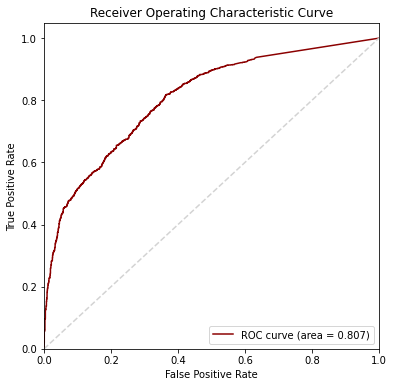

0.8068931848381176

In [ ]:
# --- Construct the training and testing sets ---
residual_g, train_samples, train_labels, test_samples, test_labels = generate_samples(graph=G, train_set_ratio=0.7)

# --- Create feature vector for all edges in training set and test set ---
train_features = feature_extractor(residual_g, train_samples)
test_features = feature_extractor(residual_g, test_samples)

# --- Link prediction ---
prediction(residual_g, train_features, test_features, train_labels, test_labels)

In [ ]:
# type(train_samples)
# train_samples


In [ ]:
# test_df=pd.read_table('test.txt',header=None,delimiter=' ',names=['source', 'target'])
# print(test_df.head())

with open('test.txt', 'r') as f:
    test_df = [(int(line.split()[0]), int(line.split()[1])) for line in f.readlines()]
# Extract features for the test node pairs
test_features = feature_extractor(G, test_df)

# Predict the labels for the test node pairs
clf = LogisticRegression()
clf.fit(train_features, train_labels)
test_preds = clf.predict(test_features)

# Print the predicted labels for the test node pairs
for i in range(len(test_df)):
    print(i, test_preds[i])






100%|██████████| 3498/3498 [00:00<00:00, 19771.82it/s]


0 0
1 0
2 0
3 0
4 0
5 0
6 1
7 0
8 0
9 1
10 0
11 0
12 1
13 1
14 1
15 1
16 0
17 0
18 1
19 1
20 0
21 1
22 0
23 1
24 1
25 1
26 1
27 0
28 1
29 1
30 0
31 0
32 1
33 1
34 0
35 1
36 1
37 0
38 0
39 1
40 1
41 1
42 1
43 1
44 1
45 1
46 0
47 1
48 1
49 0
50 0
51 1
52 0
53 0
54 0
55 1
56 1
57 0
58 0
59 1
60 1
61 0
62 0
63 0
64 1
65 0
66 1
67 1
68 1
69 0
70 0
71 1
72 0
73 0
74 0
75 0
76 0
77 1
78 0
79 1
80 1
81 0
82 1
83 1
84 1
85 1
86 0
87 0
88 1
89 1
90 0
91 1
92 1
93 0
94 0
95 0
96 0
97 0
98 1
99 1
100 1
101 1
102 0
103 1
104 0
105 0
106 0
107 0
108 0
109 1
110 1
111 0
112 0
113 1
114 1
115 1
116 1
117 1
118 1
119 0
120 0
121 1
122 0
123 1
124 0
125 0
126 1
127 1
128 0
129 0
130 1
131 1
132 0
133 1
134 1
135 1
136 0
137 1
138 1
139 0
140 0
141 1
142 1
143 1
144 1
145 1
146 1
147 0
148 1
149 1
150 0
151 1
152 0
153 0
154 0
155 0
156 1
157 1
158 0
159 1
160 0
161 0
162 0
163 1
164 1
165 1
166 1
167 1
168 1
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 1
178 0
179 1
180 0
181 1
182 0
183 1
184 1


In [ ]:
import csv

with open('mlns_pred4.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['ID', 'Predicted'])
    for i in range(len(test_df)):
        writer.writerow([i, test_preds[i]])

In [ ]:
# test_df=pd.read_table('test.txt',header=None,delimiter=' ',names=['source', 'target'])
# print(test_df.head())